In [90]:
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

In [48]:
#load the dataset
df = pd.read_csv("Autism_Data.arff")
df = df.replace('?', np.nan)

In [49]:
#column name spell check/ fixes 
df = df.rename(columns = {"A1_Score":"A1","A2_Score":"A2", 'A3_Score':'A3', 'A4_Score':'A4', 'A5_Score':'A5', 'A6_Score':'A6', 'A7_Score':'A7', 'A8_Score':'A8', 'A9_Score':'A9', 'A10_Score':'A10', "jundice":"jaundice", "austim":"autism", "contry_of_res": "country", "Class/ASD":"asd_classification"})

<AxesSubplot:>

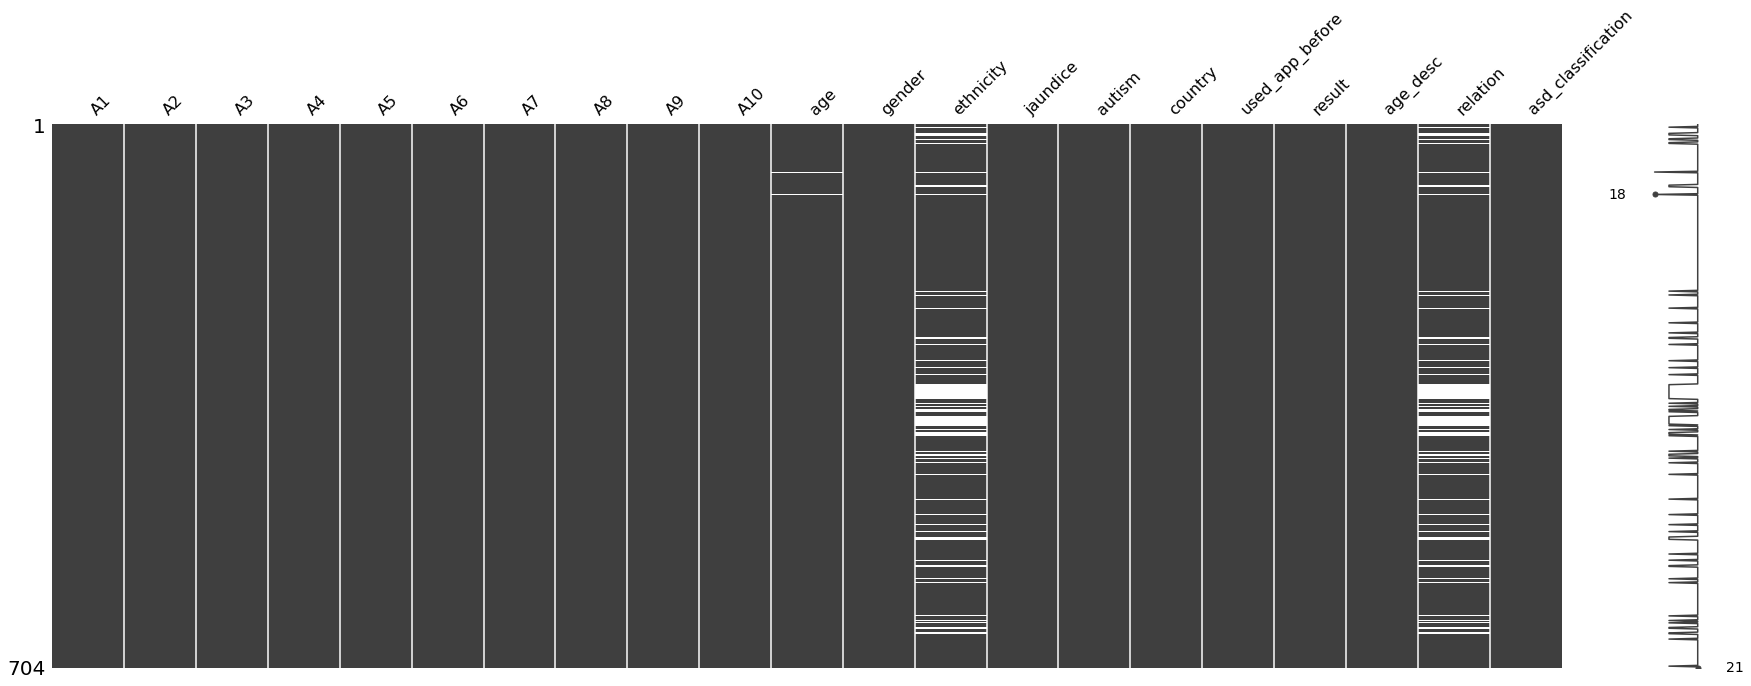

In [50]:
#Check for missing data
missingno.matrix(df, figsize =(30,10))

In [ ]:
df.head()

In [7]:
df.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
age                   object
gender                object
ethnicity             object
jaundice              object
autism                object
country               object
used_app_before       object
result                 int64
age_desc              object
relation              object
asd_classification    object
dtype: object

In [9]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,asd_classification
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [8]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


### Understanding the Scores 

AQ-10 methods scores:

The Autism-Spectrum Quotient publisehed by Baron-Cohen, Wheelwright, Skinner, Martin, & Clubley was developed to assess how adults with <I>'normal'</I> intelligence has the traits associated with autism spectrum conditions. According to [Wikia](https://psychology.wikia.org/wiki/Autism_Spectrum_Quotient), "the test consists of fifty statements, each of which is in a forced-choice format. Each question allows the subject to indicate "Definitely agree", "Slightly agree", "Slightly disagree" or "Definitely disagree". Approximately half the questions are worded to elicit an "agree" response from normal individuals, and half to elicit a "disagree" response. The subject scores one point for each question which is answered "autistically" either slightly or definitely." The questions cover five different domains associated with the autism spectrum: social skills; communication skills; imagination; attention to detail; and attention switching/tolerance of change.

However, according to the dataset, 'Yes' indicates that the individual is on the Autism Spectum and 'No' is indicated when the final score is less than or equal to 7. You can refer the questions from [here] (https://www.nice.org.uk/guidance/cg142/resources/autism-spectrum-quotient-aq10-test-pdf-186582493).

A1 I often notice small sounds when others do not
A2 I usually concentrate more on the whole picture, rather than the small details
A3 I find it easy to do more than one thing at once
A4 If there is an interruption, I can switch back to what I was doing very quickly
A5 I find it easy to ‘read between the lines’ when someone is talking to me
A6 I know how to tell if someone listening to me is getting bored
A7 When I’m reading a story I find it difficult to work out the characters’ intentions
A8 I like to collect information about categories of things (e.g. types of car, types of bird, types
of train, types of plant etc) 
A9 I find it easy to work out what someone is thinking or feeling just by looking at their face
A10 I find it difficult to work out people’s intentions



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,result
A1,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.397454
A2,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.392540
A3,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.552356
A4,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.586025
A5,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,0.639706
A6,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.630012
A7,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,0.454848
A8,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,0.324020
A9,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.661205
A10,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,0.537205


<AxesSubplot:>

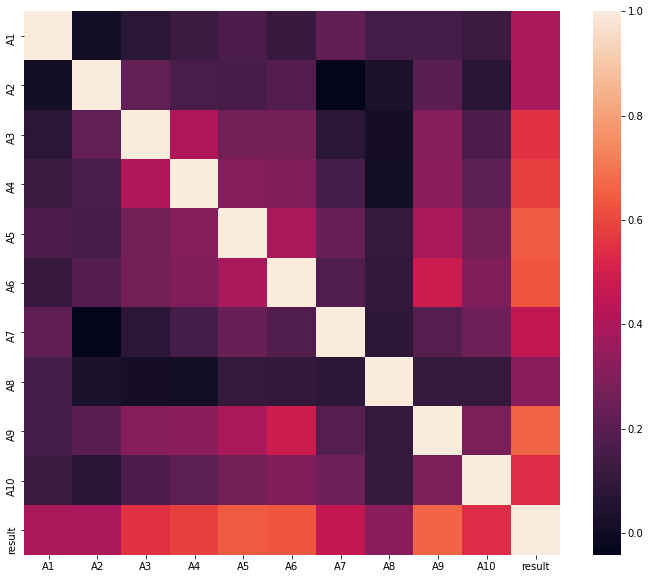

In [89]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

### Age Composition

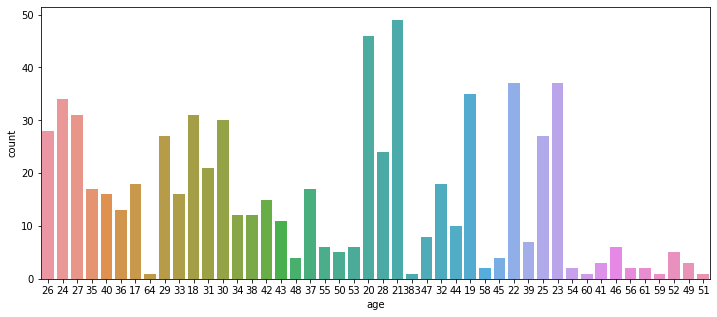

In [70]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='age', data=df);

### Country

Country of residence of the participants. Maximum participants are from United States, UAE, India, New Zealand and the UK. 

'United States'           113
'United Arab Emirates'     82
India                      81
'New Zealand'              81
'United Kingdom'           77
                         ... 
China                       1
Cyprus                      1
Bolivia                     1
Azerbaijan                  1
Nicaragua                   1
Name: country, Length: 67, dtype: int64

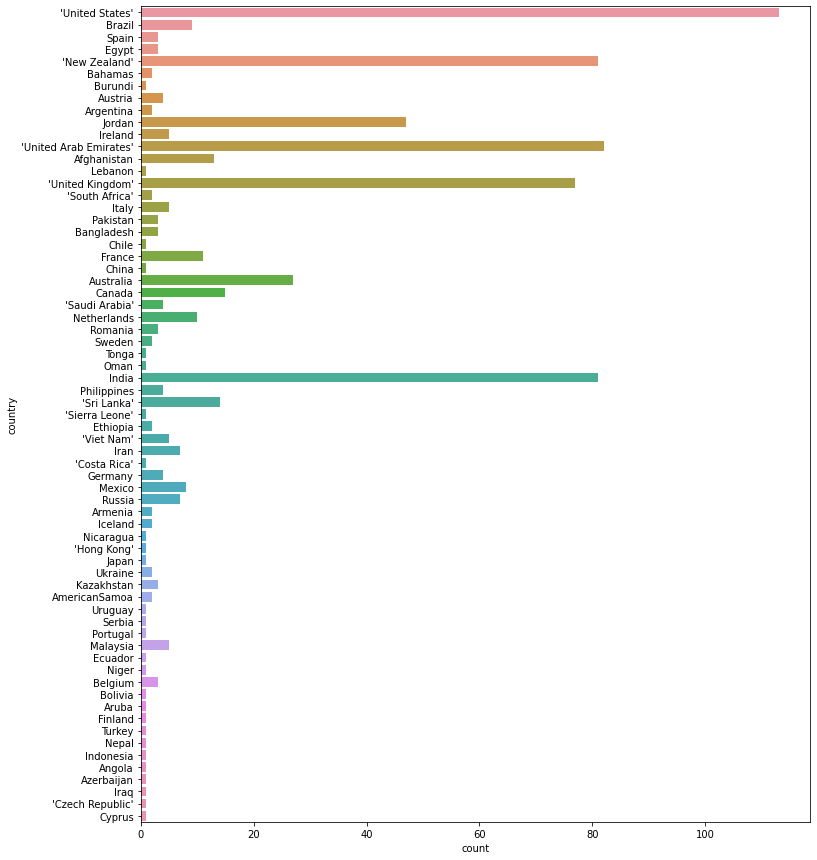

In [30]:
fig = plt.figure(figsize=(12,15))
sns.countplot(y='country', data=df);
df.country.value_counts()

### Gender distribution

If the user is male, m( = 0);
If the user is female (= 1).
According to the dataset, 367 male and 337 female persons with ASD participated.

<AxesSubplot:xlabel='gender', ylabel='count'>

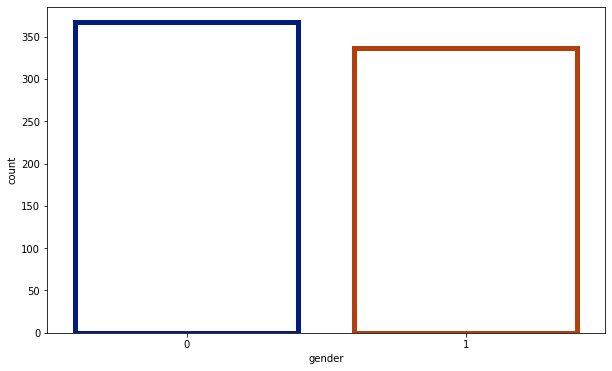

In [104]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=df, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))

In [103]:
new_df = pd.DataFrame({'gender':df.gender.map(dict(f=1,m=0))})
df.update(new_df)

### Users without Jaundice during birth

The bar shows how the ASD cases are divided into jaundice at birth cases

If the user was born with jaundice then, yes( = 1);
If the user wasn't born with jaundice then, no (= 0).
According to the dataset, 69 individuals were born with jaundice out of 704.

In [62]:
new_df= pd.DataFrame({'jaundice':df.jaundice.map(dict(yes=1,no=0))})
df.update(new_df)

0    635
1     69
Name: jaundice, dtype: int64

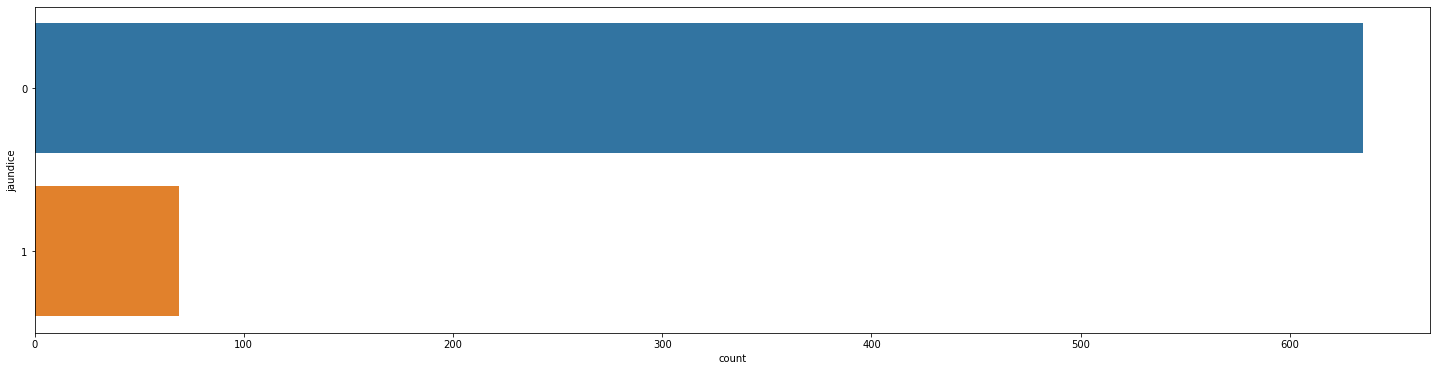

In [81]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='jaundice', data=df);
df.jaundice.value_counts()

<AxesSubplot:xlabel='gender', ylabel='jaundice'>

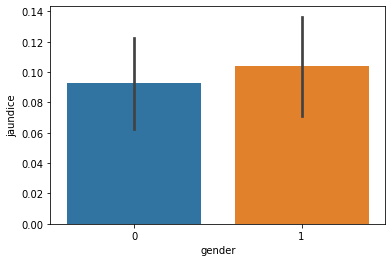

In [84]:
sns.barplot(x='gender', y='jaundice', data=df)

### Autism

If the user has an immediate family member who had a Pervasive Developmental Disorder then, yes( = 1);
If the user has an immediate family member who had  Pervasive Developmental Disorder then, no( = 0);
According to the dataset, 91 individuals had a family member who had PDD out of 704.

In [16]:
new_df= pd.DataFrame({'autism':df.autism.map(dict(yes=1,no=0))})
df.update(new_df)

0    613
1     91
Name: autism, dtype: int64

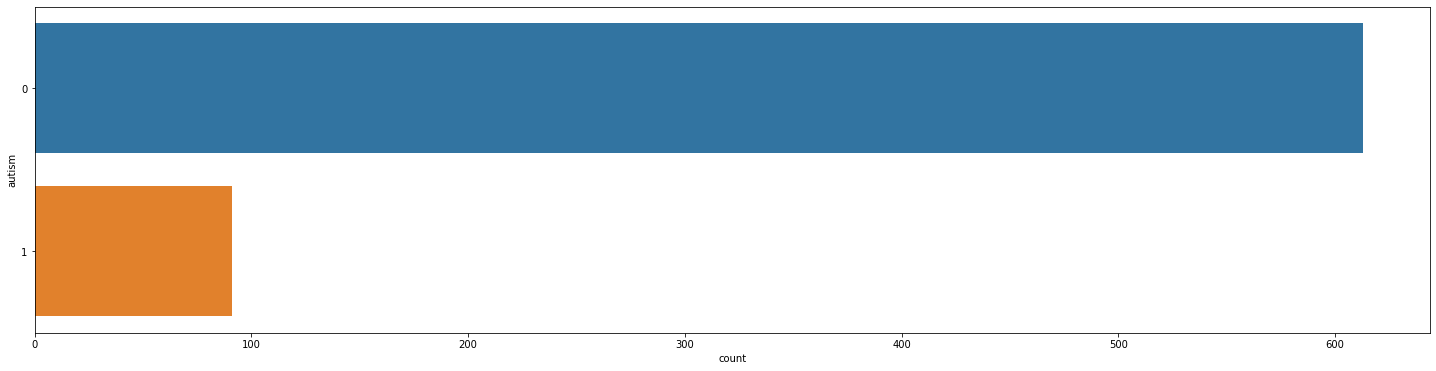

In [17]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='autism', data=df);
df.autism.value_counts()

### ASD Classification

In [18]:
new_df = pd.DataFrame({'asd_classification':df.asd_classification.map(dict(YES=1,NO=0))})
df.update(new_df)

0    515
1    189
Name: asd_classification, dtype: int64

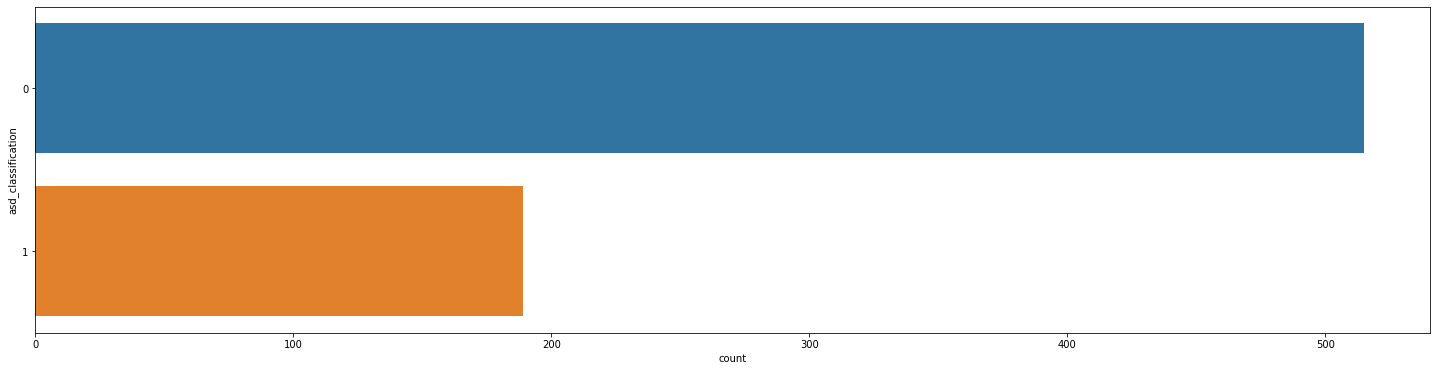

In [19]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='asd_classification', data=df);
df.asd_classification.value_counts()

### Used App Before

Whether the p/w ASD has used a screening app

In [20]:
new_df = pd.DataFrame({'used_app_before':df.used_app_before.map(dict(yes=1,no=0))})
df.update(new_df)

0    692
1     12
Name: used_app_before, dtype: int64

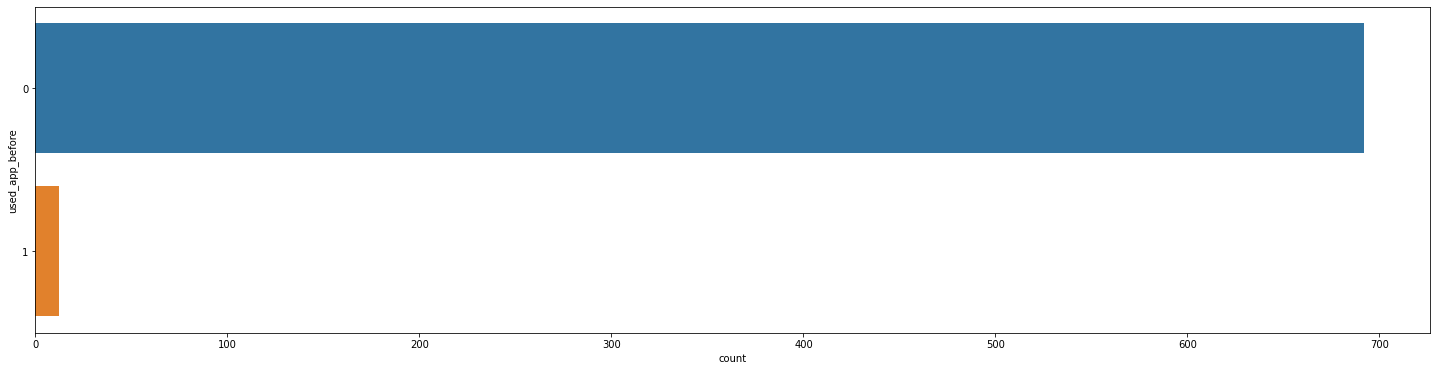

In [21]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='used_app_before', data=df);
df.used_app_before.value_counts()

0    692
1     12
Name: used_app_before, dtype: int64

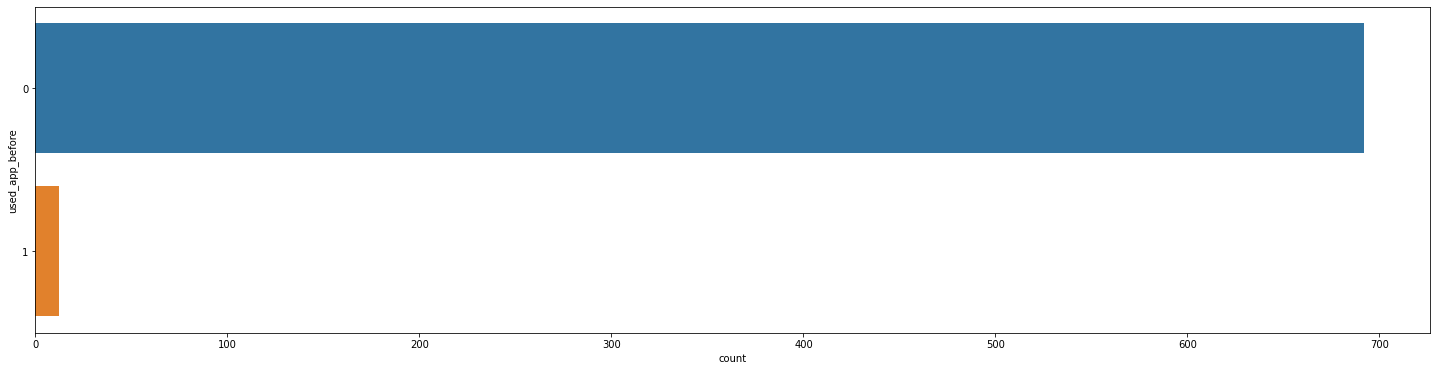

In [22]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='used_app_before', data=df);
df.used_app_before.value_counts()

In [23]:
#Check ethnicity and relation cols
df['ethnicity'].value_counts()

White-European       233
Asian                123
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

In [24]:
df['relation'].value_counts()

Self                          522
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64